In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [68]:
train = pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\data.csv',usecols=['date','sales'])
test = pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\test.csv',usecols=['date'])
sub = pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\submission.csv',usecols=['id'])
train.head()

,date,sales
0,2012-01-01,0
1,2012-01-01,1
2,2012-01-01,0
3,2012-01-01,0
4,2012-01-01,0


In [69]:
train.shape

(395000, 2)

In [70]:
train_original = train.copy()
train.columns

Index(['date', 'sales'], dtype='object')

In [71]:
train.dtypes

date     object
sales     int64
dtype: object

In [72]:
train['date'] = pd.to_datetime(train.date)
train_original['date'] = pd.to_datetime(train_original.date)

In [73]:
for i in (train, train_original):
    i['year'] = i.date.dt.year
    i['month'] = i.date.dt.month
    i['day']= i.date.dt.day
    i['dayofweek']=i.date.dt.dayofweek

In [74]:
temp = train['date']

In [75]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['date'].apply(applyer)
train['weekend'] = temp2


No handles with labels found to put in legend.


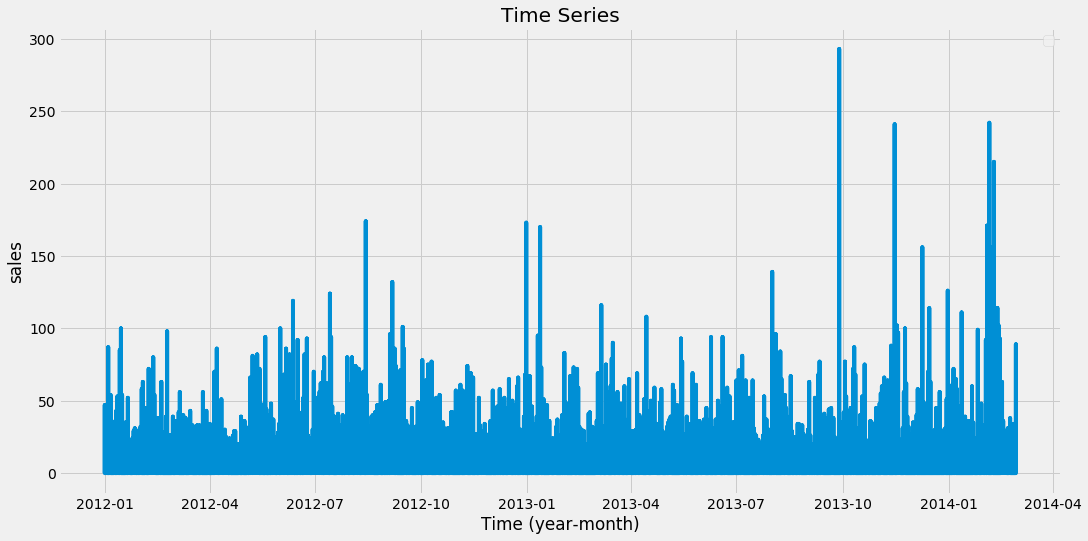

In [76]:
train.index = train['date']
df = train.copy()
ts = df['sales']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("sales")
plt.legend(loc = 'best')

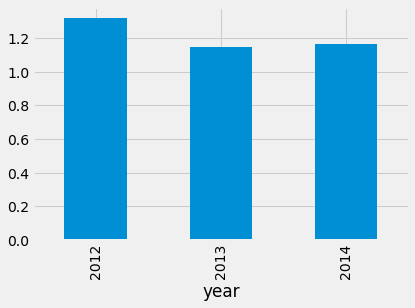

In [77]:
train.groupby('year')['sales'].mean().plot.bar()

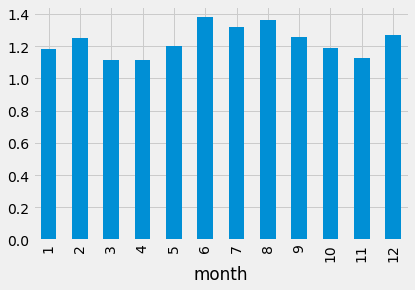

In [78]:
train.groupby('month')['sales'].mean().plot.bar()

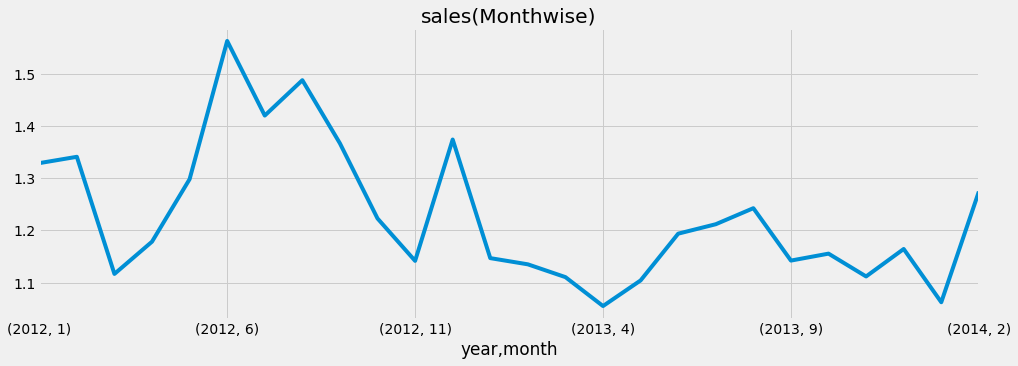

In [79]:
temp = train.groupby(['year', 'month'])['sales'].mean()
temp.plot(figsize =(15,5), title = "sales(Monthwise)", fontsize = 14)

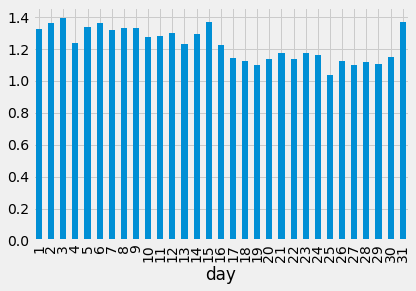

In [80]:
train.groupby('day') ['sales'].mean().plot.bar()

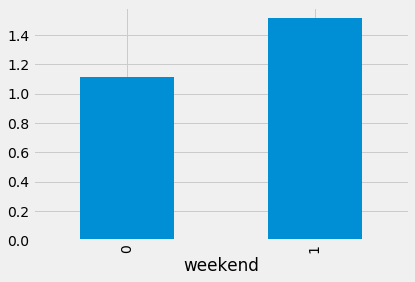

In [81]:
train.groupby('weekend') ['sales'].mean().plot.bar()

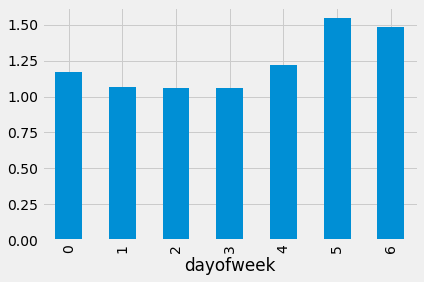

In [82]:
train.groupby('dayofweek') ['sales'].mean().plot.bar()

In [83]:
train.date = pd.to_datetime(train.date)
train.index = train.date


#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

#Quatarly
quater = train.resample('Q').mean()

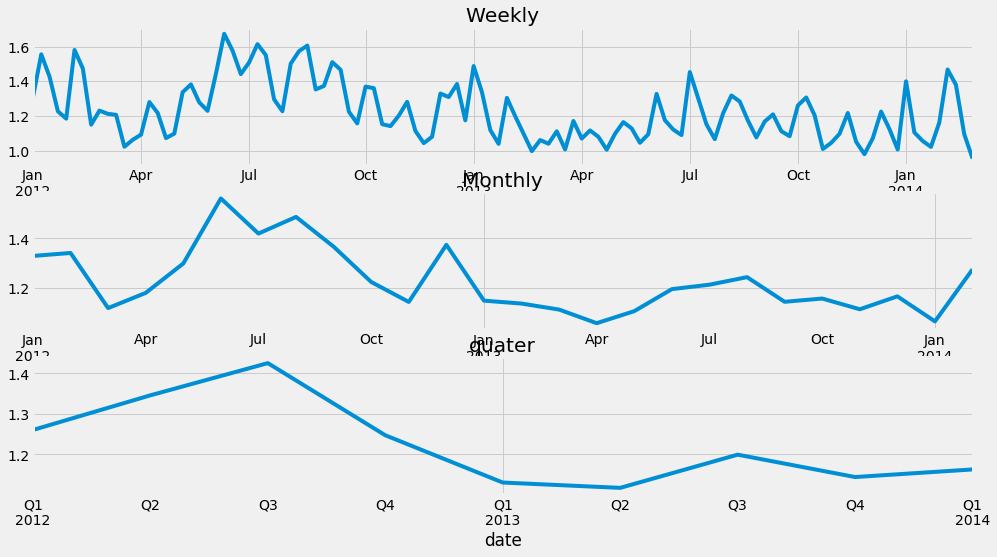

In [84]:
fig,axs = plt.subplots(3,1)
#daily.sales.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[0])
weekly.sales.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[0])
monthly.sales.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[1])
quater.sales.plot(figsize = (15,8), title = "quater", fontsize = 14, ax = axs[2])

In [85]:
train.head()

,date,sales,year,month,day,dayofweek,weekend
date,,,,,,,
2012-01-01,2012-01-01,0,2012,1,1,6,1
2012-01-01,2012-01-01,1,2012,1,1,6,1
2012-01-01,2012-01-01,0,2012,1,1,6,1
2012-01-01,2012-01-01,0,2012,1,1,6,1
2012-01-01,2012-01-01,0,2012,1,1,6,1


In [86]:
train.Timestamp = pd.to_datetime(train.date)
train.index = train.Timestamp
#Converting to Daily mean
train = train.resample('D').mean()

In [87]:
Train = train.ix['2012-01-01':'2013-12-31']
valid = train.ix['2014-01-01':'2014-02-28']

In [88]:
Train.shape,valid.shape

((731, 6), (59, 6))

# Naive Approach

Text(0.5, 1.0, 'Naive Forecast')

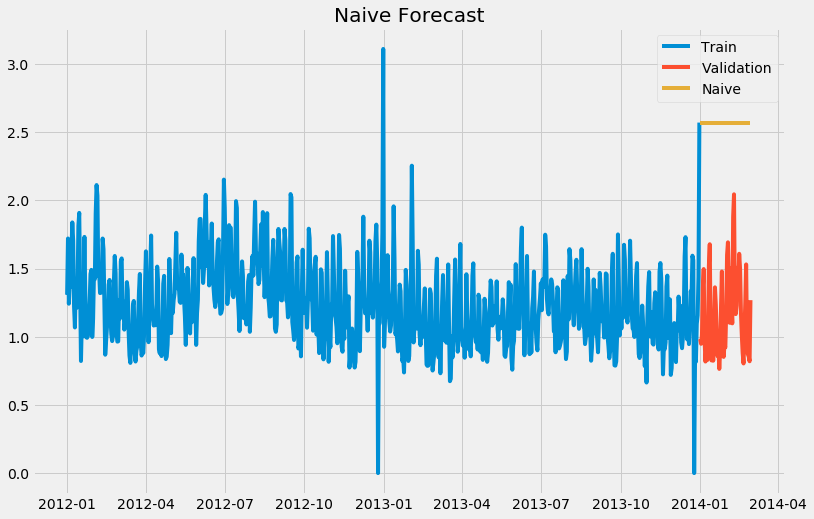

In [89]:
dd = np.asarray(Train.sales)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['sales'],label = 'Train')
plt.plot(valid.index, valid['sales'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

### RMSE for navie

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.sales, y_hat.naive))
rmse

1.4381209255866383

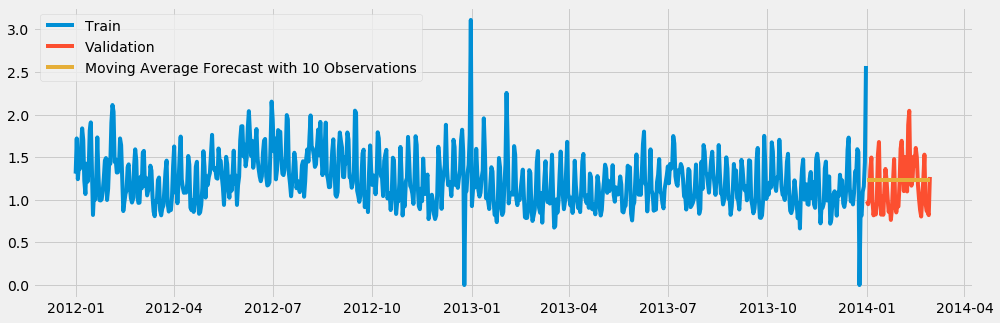

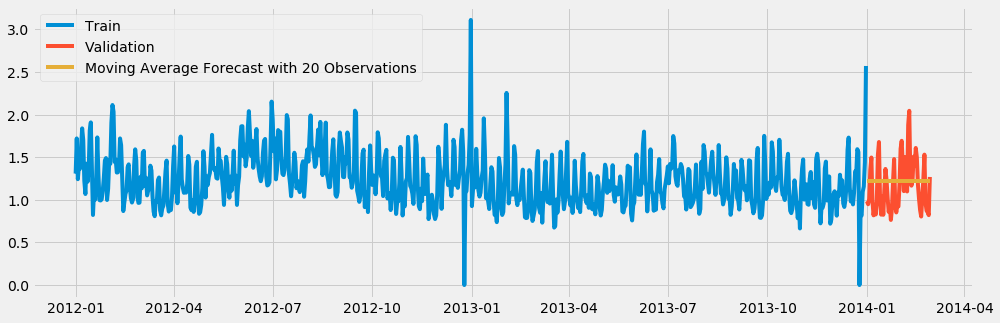

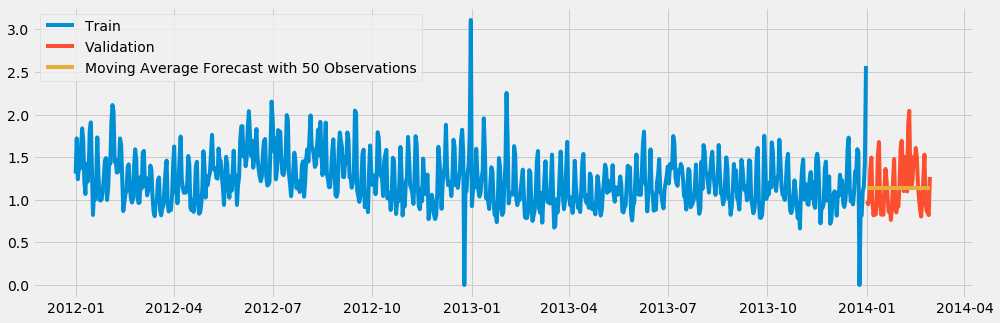

In [91]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['sales'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['sales'], label = 'Train')
plt.plot(valid['sales'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['sales'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['sales'], label = 'Train')
plt.plot(valid['sales'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['sales'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['sales'], label = 'Train')
plt.plot(valid['sales'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

### RMSE for MA

In [92]:
rmse = sqrt(mean_squared_error(valid['sales'], y_hat_avg['moving_average_forecast']))
rmse

0.2994076989148603

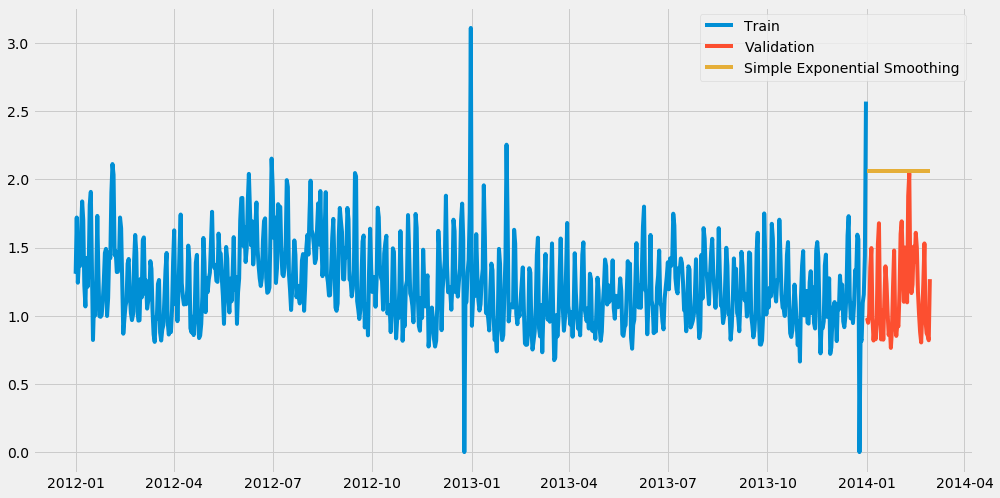

In [93]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['sales'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['sales'], label = 'Train')
plt.plot(valid['sales'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

In [94]:
rmse = sqrt(mean_squared_error(valid.sales, y_hat['SES']))
rmse

0.9458305123446712

### Holt's Linear Model

<Figure size 1600x800 with 0 Axes>

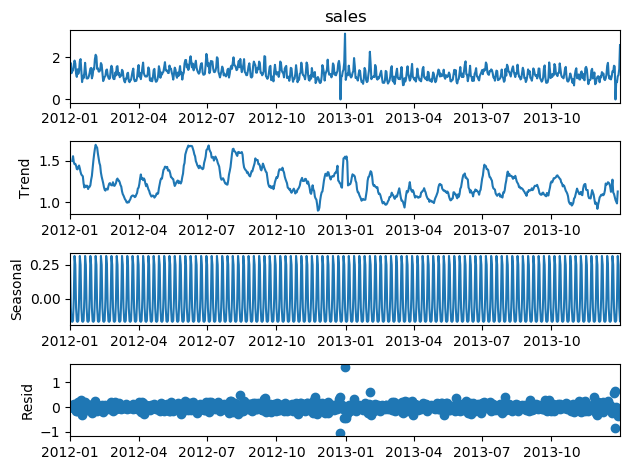

In [95]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.sales).plot()
result = sm.tsa.stattools.adfuller(train.sales)
plt.show()

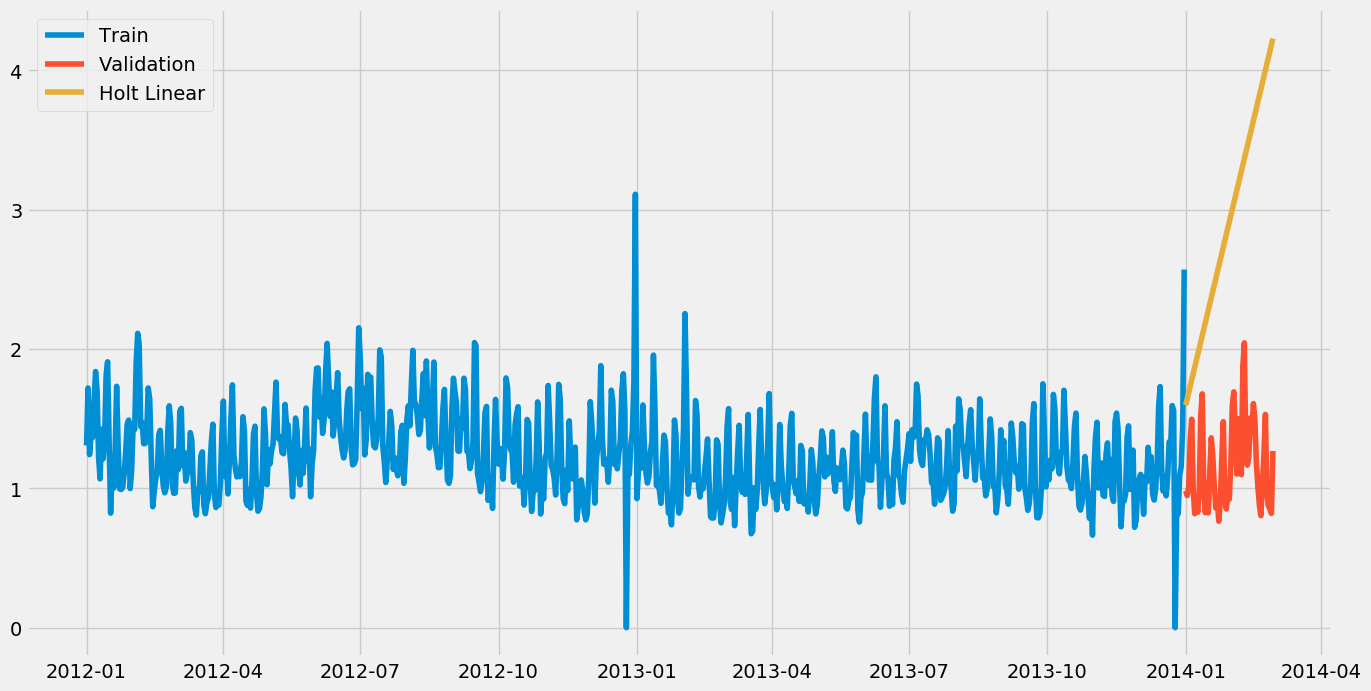

In [96]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['sales'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.sales, label = 'Train')
plt.plot(valid.sales, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [97]:
rmse = sqrt(mean_squared_error(valid.sales, y_hat_holt.Holt_linear))
rmse

1.917036426056838

### Holt's Winter Model

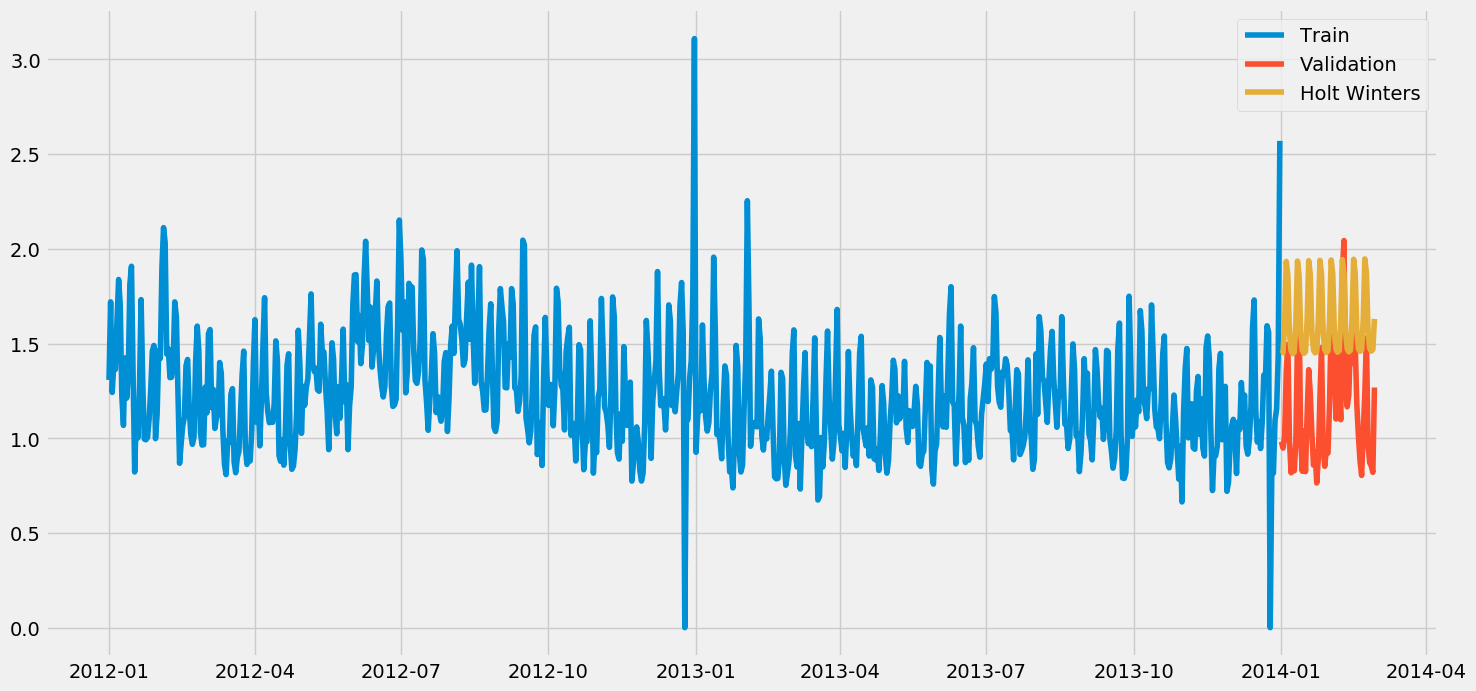

In [98]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['sales']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['sales'], label = 'Train')
plt.plot(valid['sales'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [99]:
rmse = sqrt(mean_squared_error(valid['sales'], y_hat_avg['Holt_Winter']))
rmse

0.49839870536663927

### ARIMA Model

In [100]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = timeseries.rolling(24).mean()    
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)


from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_original['sales'])

## ARMA

Text(0.5, 1.0, 'ARMA Model')

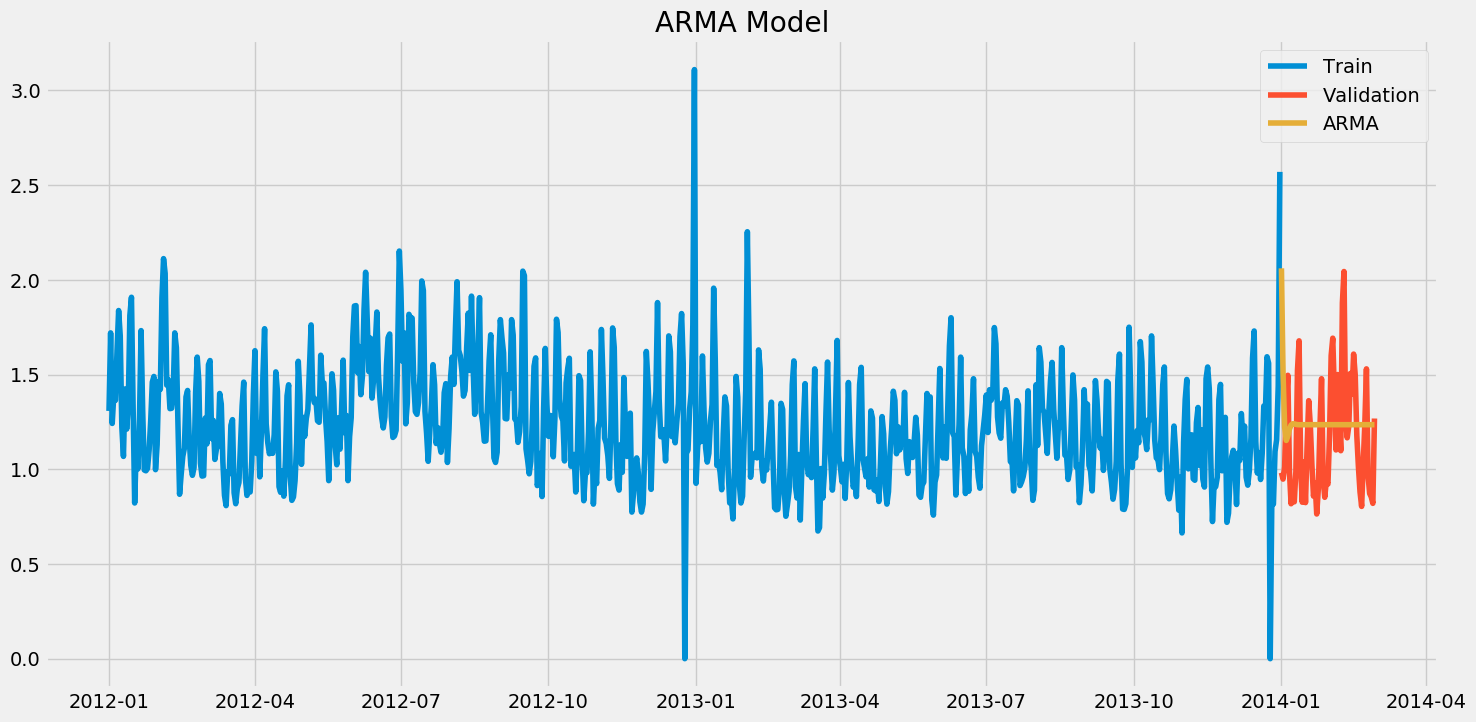

In [101]:
# ARIMA example
from statsmodels.tsa.arima_model import ARMA
# fit model
y_hat_avg = valid.copy()
fit1 = ARMA(Train.sales, order = (2,1,4)).fit()
y_hat_avg['ARMA'] = fit1.predict(start="2014-01-01", end="2014-02-28", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['sales'], label = "Train")
plt.plot(valid.sales, label = "Validation")
plt.plot(y_hat_avg['ARMA'], label ="ARMA")
plt.legend(loc = "best")
plt.title("ARMA Model")

In [102]:
rms = sqrt(mean_squared_error(valid.sales, y_hat_avg.ARMA))
print(rms)

0.3427461457751305


## ARIMA

Text(0.5, 1.0, 'ARIMA Model')

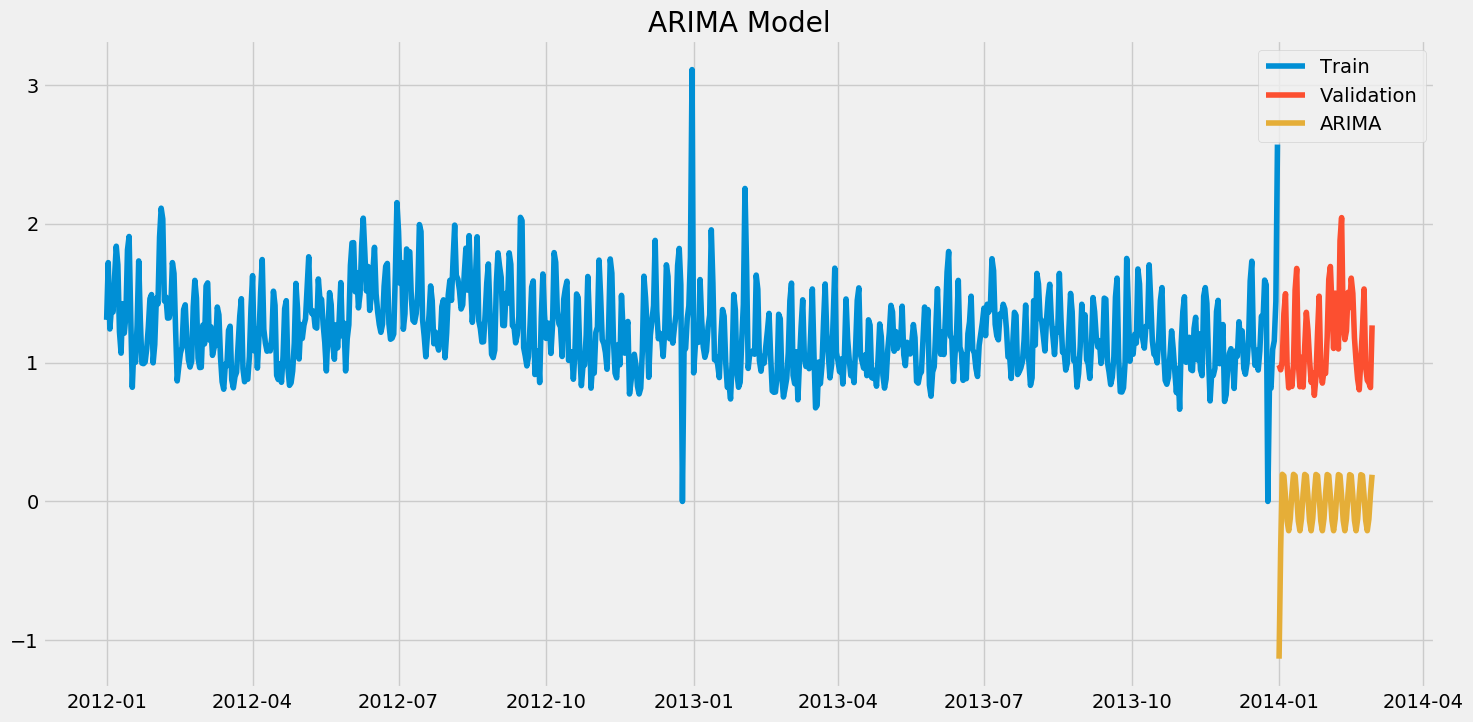

In [103]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
# fit model
y_hat_avg = valid.copy()
fit1 = ARIMA(Train.sales, order = (2,1,4)).fit()
y_hat_avg['ARIMA'] = fit1.predict(start="2014-01-01", end="2014-02-28", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['sales'], label = "Train")
plt.plot(valid.sales, label = "Validation")
plt.plot(y_hat_avg['ARIMA'], label ="ARIMA")
plt.legend(loc = "best")
plt.title("ARIMA Model")

In [104]:
rms = sqrt(mean_squared_error(valid.sales, y_hat_avg.ARIMA))
print(rms)

1.2229015486563322


## SARIMAX

Text(0.5, 1.0, 'SARIMAX Model')

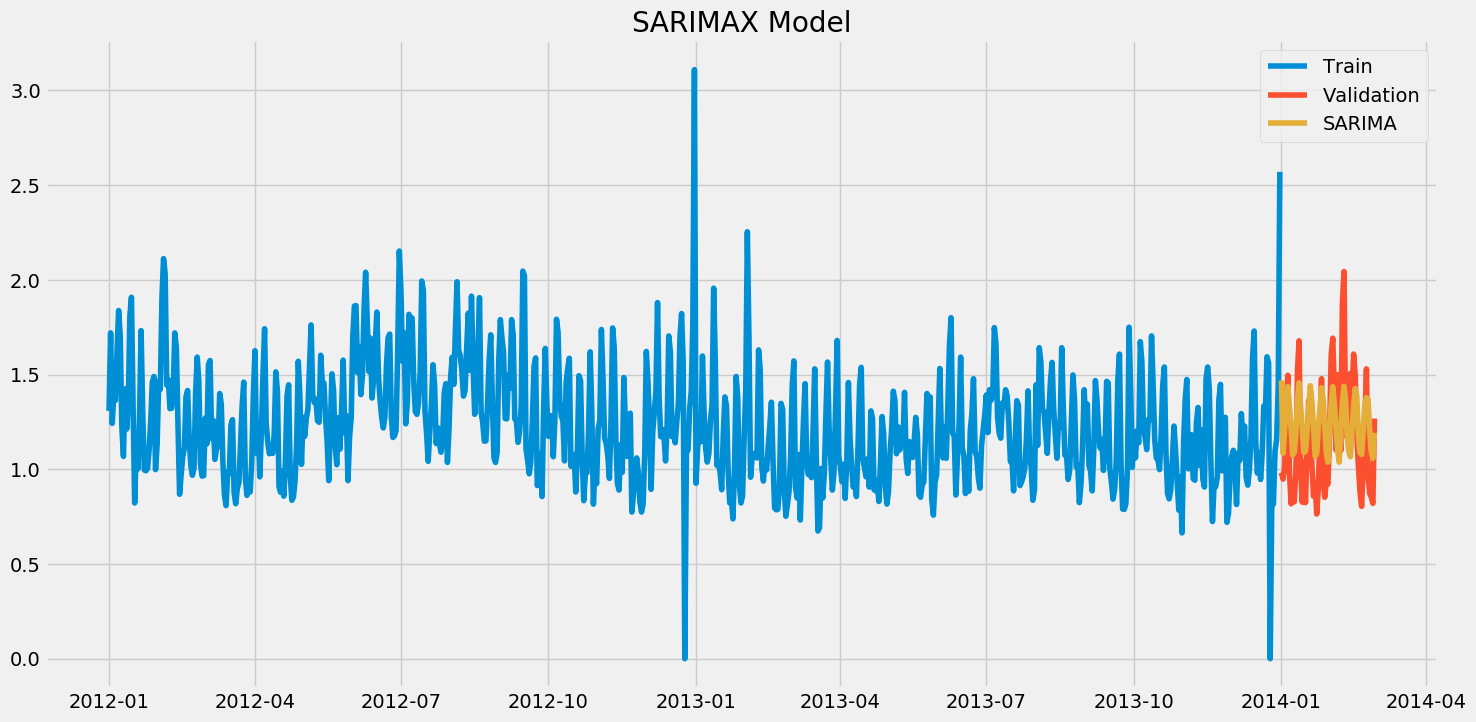

In [129]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.sales, order = (2,1,4), seasonal_order =(0,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-01-01", end="2014-02-28", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['sales'], label = "Train")
plt.plot(valid.sales, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [130]:
rms = sqrt(mean_squared_error(valid.sales, y_hat_avg.SARIMA))
print(rms)

0.26037287813596643


In [109]:
Train.sales

date
2012-01-01    1.308
2012-01-02    1.720
2012-01-03    1.242
2012-01-04    1.394
2012-01-05    1.364
              ...  
2013-12-27    0.816
2013-12-28    1.094
2013-12-29    1.156
2013-12-30    1.440
2013-12-31    2.570
Freq: D, Name: sales, Length: 731, dtype: float64

In [110]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [115]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Train.sales,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2423.4961693001087
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1702.3229750934952
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:811.9676142351428
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:349.6202095779472
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:792.7284531284936
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:343.1601816980617
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:659.3003359603954
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:357.2743172500669
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1612.512466263533
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1134.2375086083662
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:579.9974543651113
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:119.5302742140697
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:547.3775821166853
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:116.1855958425371
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:416.6474941144386
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:128.3991922003837
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:268.7447951842297
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:237.47452902164952
ARIMA(

In [116]:
#ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:51.37839229255255
mod = sm.tsa.statespace.SARIMAX(Train.sales,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4387      0.028     15.835      0.000       0.384       0.493
ma.L1         -0.9542      0.015    -62.586      0.000      -0.984      -0.924
ar.S.L12       0.1661      0.134      1.243      0.214      -0.096       0.428
ma.S.L12      -0.4181      0.132     -3.166      0.002      -0.677      -0.159
sigma2         0.0616      0.002     37.049      0.000       0.058       0.065


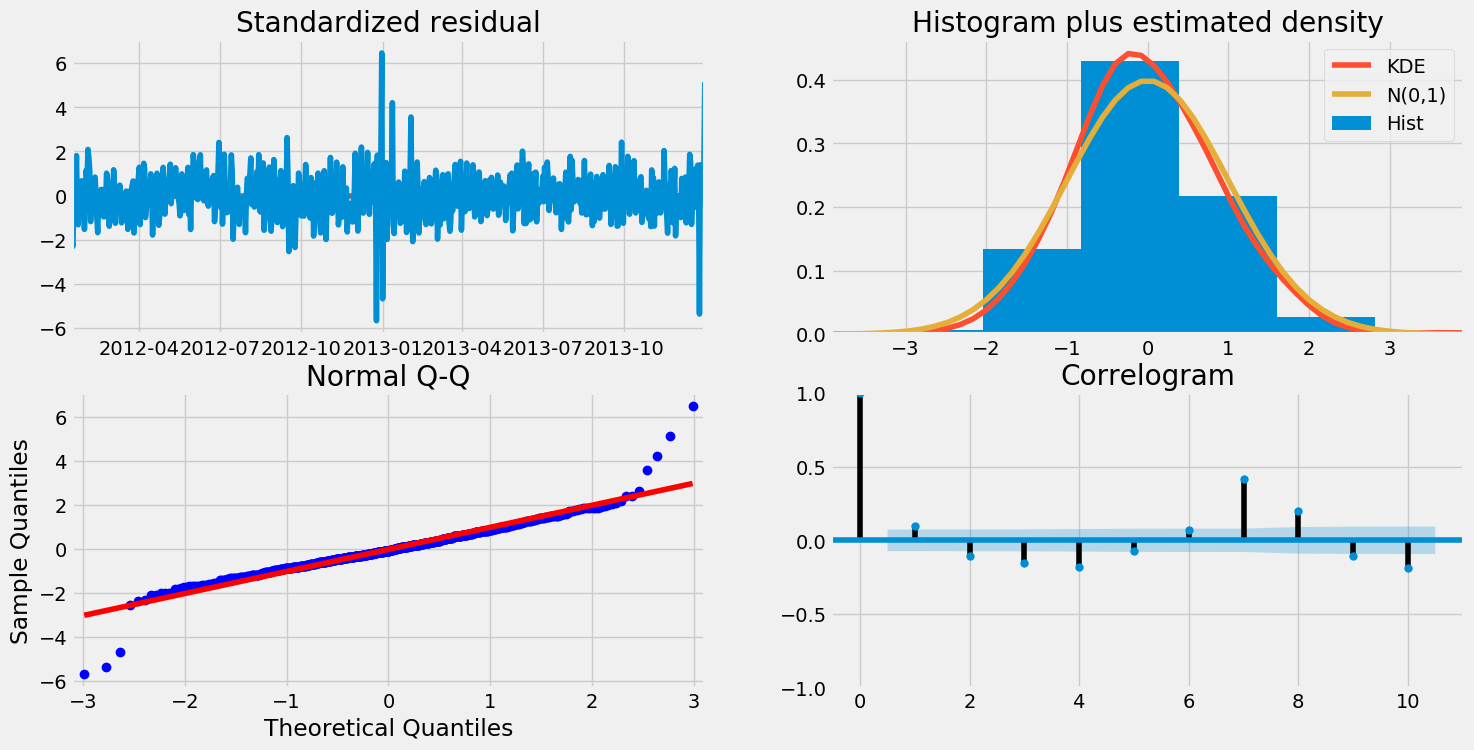

In [117]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [120]:
Train.sales['2012':]

date
2012-01-01    1.308
2012-01-02    1.720
2012-01-03    1.242
2012-01-04    1.394
2012-01-05    1.364
              ...  
2013-12-27    0.816
2013-12-28    1.094
2013-12-29    1.156
2013-12-30    1.440
2013-12-31    2.570
Freq: D, Name: sales, Length: 731, dtype: float64

In [121]:
Train.sales

date
2012-01-01    1.308
2012-01-02    1.720
2012-01-03    1.242
2012-01-04    1.394
2012-01-05    1.364
              ...  
2013-12-27    0.816
2013-12-28    1.094
2013-12-29    1.156
2013-12-30    1.440
2013-12-31    2.570
Freq: D, Name: sales, Length: 731, dtype: float64

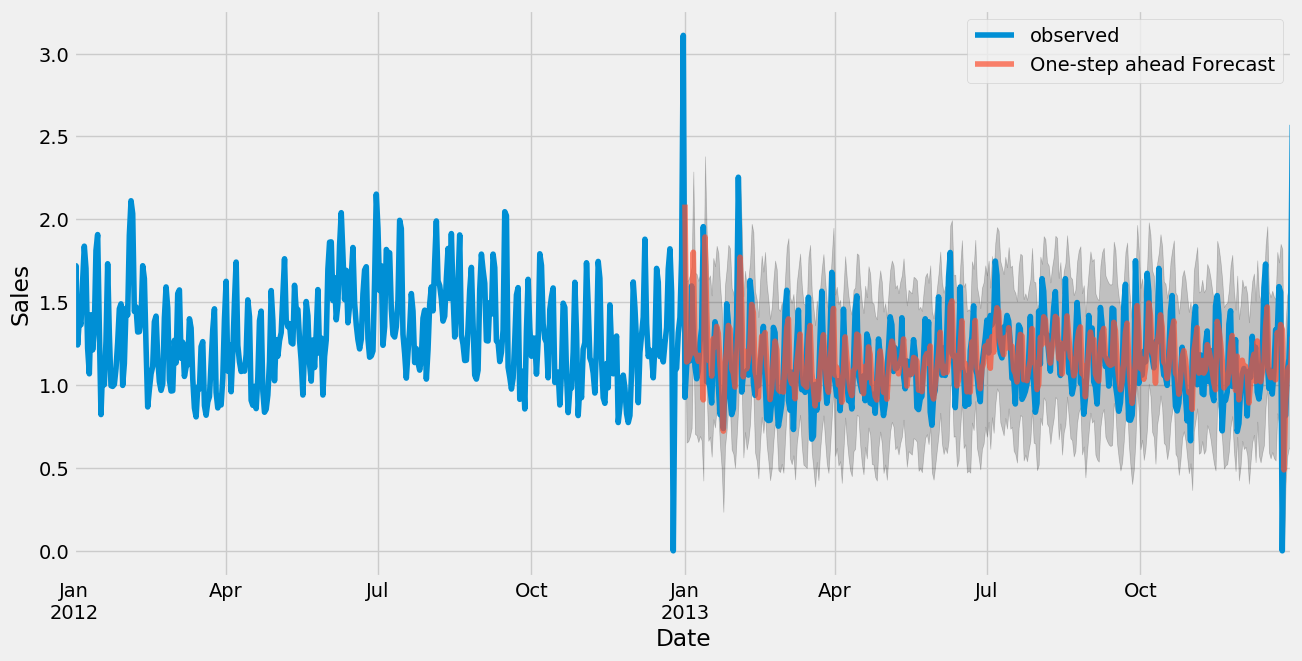

In [152]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = Train.sales['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

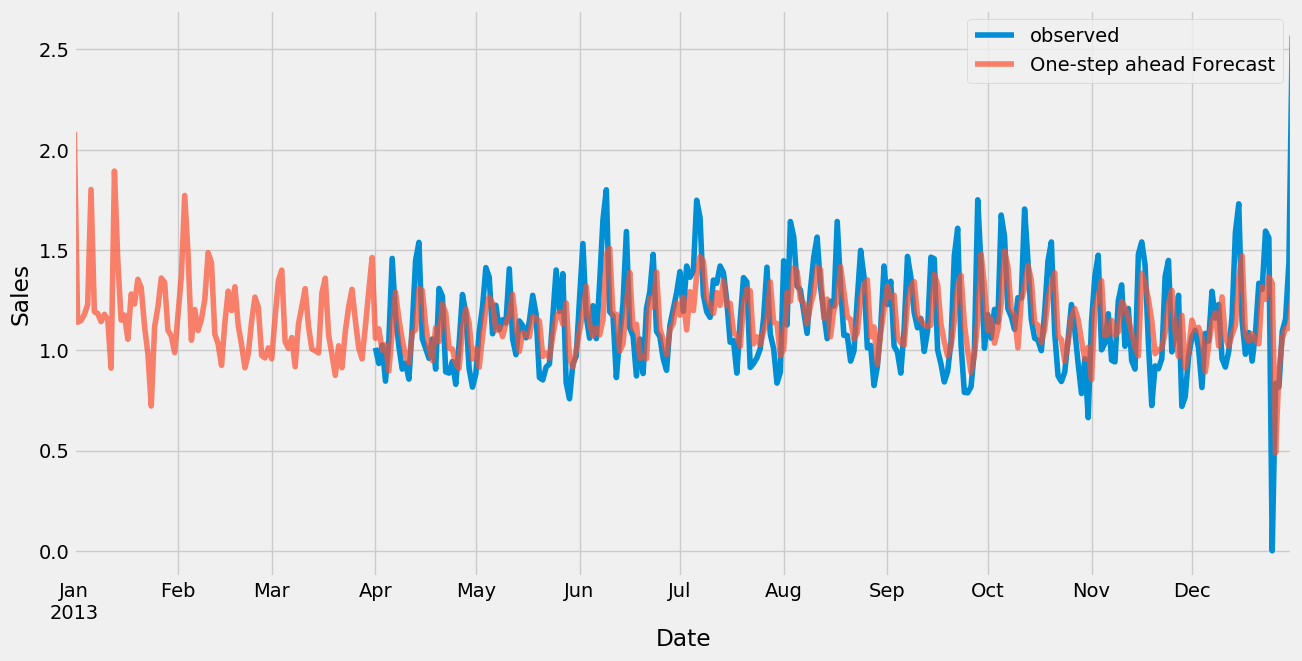

In [153]:
pred1 = results.get_prediction(start=pd.to_datetime('2014-03-01'), dynamic=False)
pred_ci = pred1.conf_int()
ax = Train.sales['2013-04-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

# With ARIMA

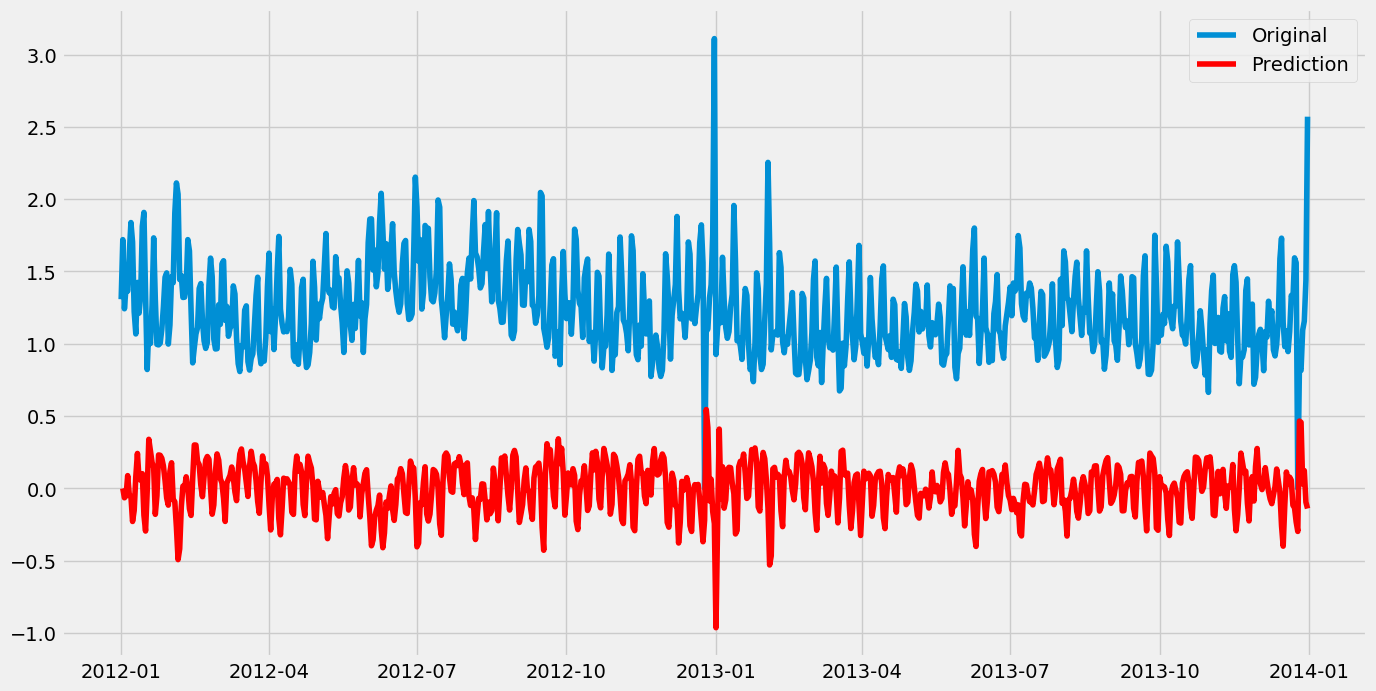

In [181]:
plt.figure(figsize = (15,8))
model = ARIMA(Train.sales, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(Train.sales, label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

# With SARIMA Best Model

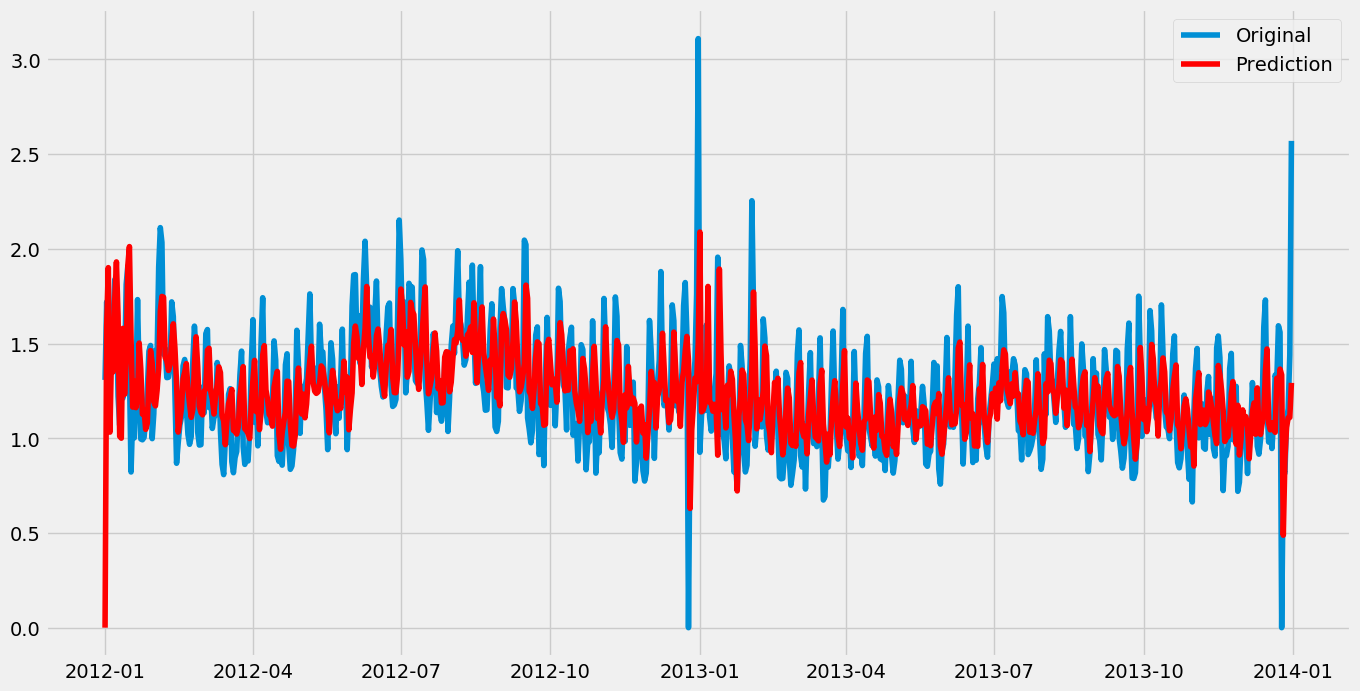

In [183]:
plt.figure(figsize = (15,8))
#model = ARIMA(Train.sales, order = (0,1,2)) # here the p value is 0 since it is moving average model
#results_MA = results.fit(disp = -1)
plt.plot(Train.sales, label = "Original")
plt.plot(results.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

# Arima GridSearchCV

In [ ]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [2,3,4,5]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(Train.sales.values, p_values, d_values, q_values)

ARIMA(2, 0, 0) MSE=0.054
ARIMA(2, 0, 1) MSE=0.054
ARIMA(2, 0, 2) MSE=0.056
ARIMA(2, 1, 0) MSE=0.070
ARIMA(2, 1, 1) MSE=0.053
ARIMA(2, 1, 2) MSE=0.052
ARIMA(2, 2, 0) MSE=0.107
ARIMA(3, 0, 0) MSE=0.054
ARIMA(3, 0, 1) MSE=0.053
ARIMA(3, 0, 2) MSE=0.045
ARIMA(3, 1, 0) MSE=0.067
ARIMA(3, 1, 1) MSE=0.052
ARIMA(3, 1, 2) MSE=0.051
ARIMA(3, 2, 0) MSE=0.102
ARIMA(4, 0, 0) MSE=0.054
ARIMA(4, 0, 1) MSE=0.052


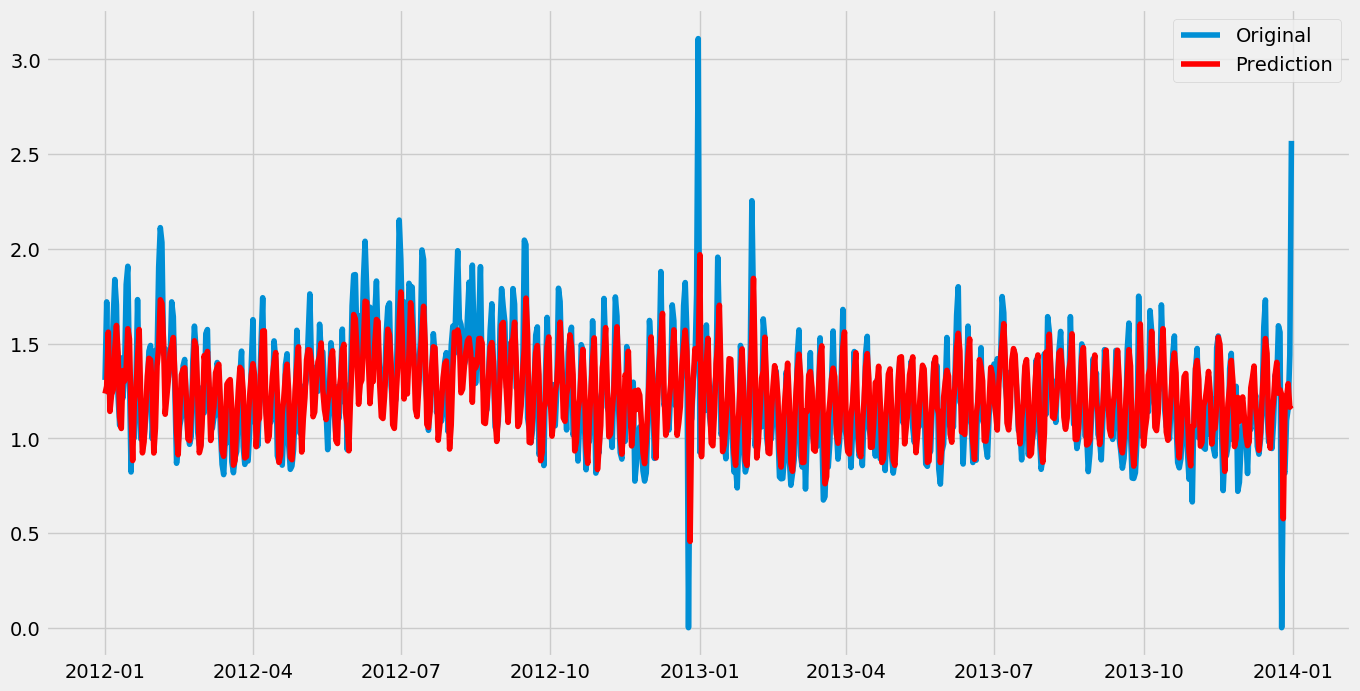

In [187]:
#Best ARIMA(3, 0, 2) MSE=0.045
plt.figure(figsize = (15,8))
model = ARIMA(Train.sales, order = (3, 0, 2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(Train.sales, label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [201]:
import pandas as pd 
score = [['Naive Approach',1.4381209255866383], ['MA',0.2994076989148603], ['Holts Linear Model',1.917036426056838],['Holts Winter Model',0.49843496104513757],['ARMA',0.34274614087265104],['ARIMA',1.2228719065217184],['SARIMAX',0.2517255333278645]] 
df = pd.DataFrame(score, columns = ['Models', 'ValidScore']) 
df

,Models,ValidScore
0,Naive Approach,1.438121
1,MA,0.299408
2,Holts Linear Model,1.917036
3,Holts Winter Model,0.498435
4,ARMA,0.342746
5,ARIMA,1.222872
6,SARIMAX,0.251726


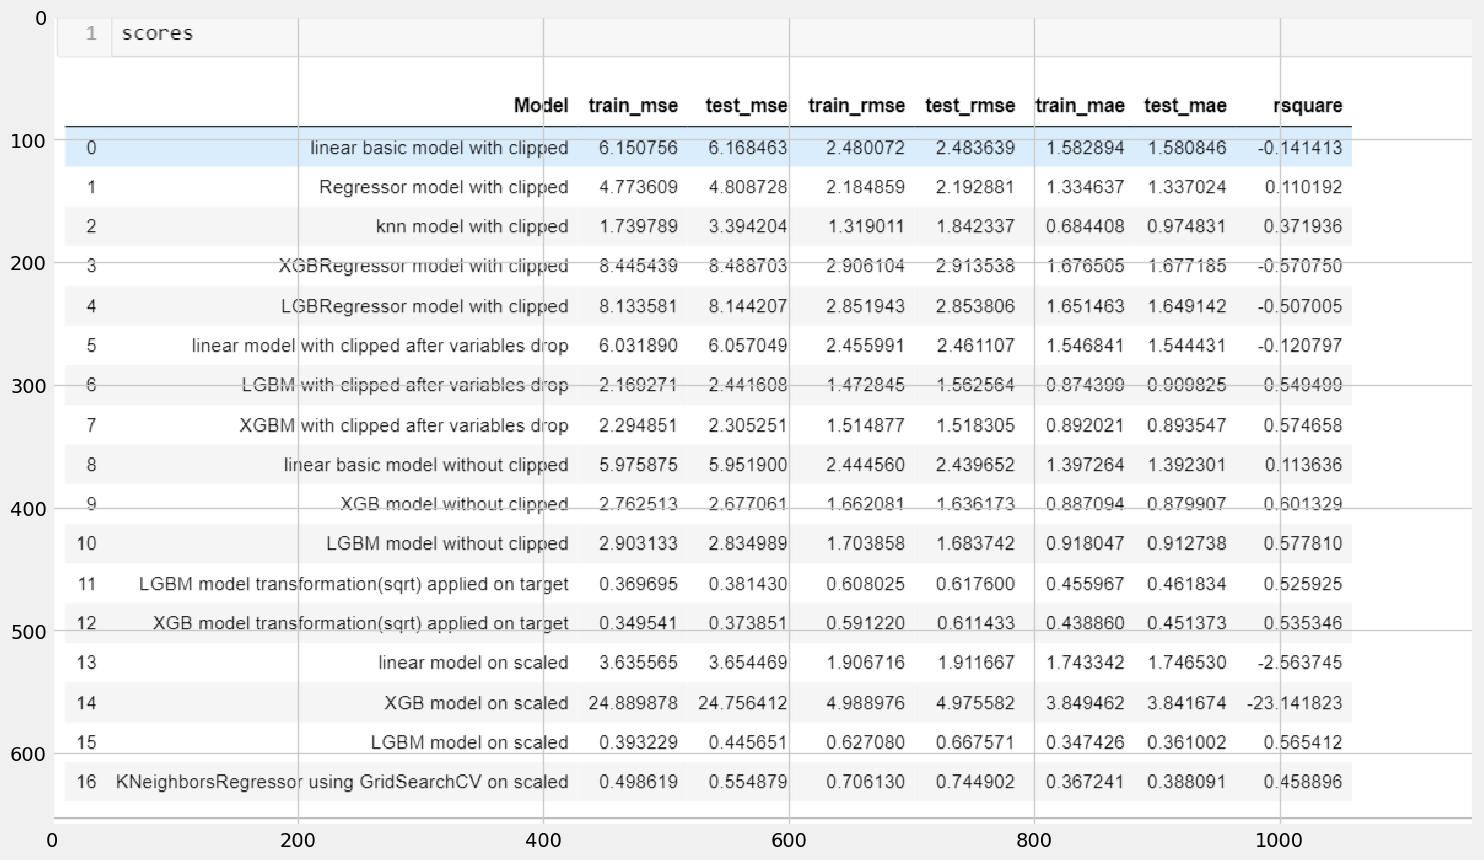

In [195]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('C:\\Users\\Riyansika\\Desktop\\mith exam\\submission\\regression summary.png')
imgplot = plt.imshow(img)

In [210]:
train_original.date.min(),train_original.date.max()

('2012-01-01', '2014-02-28')

In [ ]:
2+3